In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal
import matplotlib.image as mpimg
import sys

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

Sobel implementation : 0,1 threshold , because of dark image.

In [3]:
def main(argv1,argv2):
    arv1 = str(argv1)
    # Load an image
    f = np.array(Image.open(argv1))
    
    plt.imshow(f, cmap="gray")
    plt.show()

    filter_gx_sobel = np.array([
            [1.0, 0.0, -1.0],
            [2.0, 0.0, -2.0],
            [1.0, 0.0, -1.0],
        ])

    filter_gy_sobel = np.array([
            [1.0, 2.0, 1.0],
            [0.0, 0.0, 0.0],
            [-1.0, -2.0, -1.0],
        ])

    if(len(f.shape)<3):
          print 'gray'
    elif len(f.shape)==3:
          f = rgb2gray(f)
    
    plt.imshow(f,cmap='gray')
    plt.show()

    sobel_x = []
    sobel_y = []

    sobel_x = scipy.signal.convolve2d(f, filter_gx_sobel, mode='same')
    sobel_y = scipy.signal.convolve2d(f, filter_gy_sobel, mode='same')

    sobelmag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y) 

    sobelmag_max = np.max(sobelmag)
    threshold = float(argv2) * sobelmag_max #calculate threshold value

    h,w = sobelmag.shape

    for i in range(0,h):
        for j in range(0,w):
            if(sobelmag[i][j]>=threshold):
                sobelmag[i][j]=255.0
            else:
                sobelmag[i][j]=0

    print sobelmag.shape
    print sobelmag

    plt.imshow(sobelmag, cmap='gray')
    plt.show()

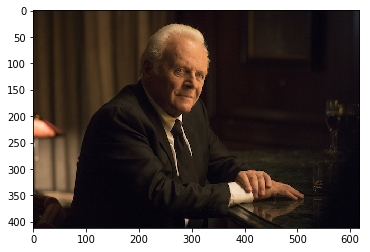

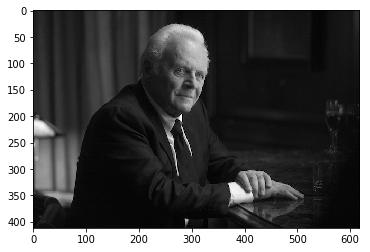

(412, 618)
[[255. 255. 255. ... 255. 255. 255.]
 [255.   0.   0. ...   0.   0. 255.]
 [255.   0.   0. ...   0.   0. 255.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


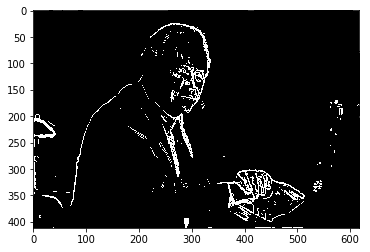

In [4]:
if __name__ == "__main__":
    main("DrFord.jpg",0.1)